# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

Strategy - стратегия, задающая тип эволюционного поиска. Описывается формулой x/y/z, где:
- x - метод выбора кандидата из популяции (может быть rand - случайное решение, best - лучшее решение и др.);
- y - количество разностных векторов, добавляемых к выбранному решению (обычно 1 или 2);
- z - распределение, определяющее вероятность замены кандидата новым (обычно биномиальное bin или экспоненциальное exp).
Стратегия по умолчанию - best1bin. 

In [4]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [8]:
strats = ['best1bin', 
          'best1exp', 
          'rand1exp',
          'randtobest1exp',
          'currenttobest1exp',
          'best2exp',
          'rand2exp',
          'randtobest1bin',
          'currenttobest1bin',
          'best2bin',
          'rand2bin',
          'rand1bin']

for strat in strats:
    result = differential_evolution(ackley, bounds, strategy = strat, seed=42)
    print('strat = {}, x = {}, f = {}, iter = {}'.format(strat, result['x'], result['fun'], result['nit']))

strat = best1bin, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
strat = best1exp, x = [0. 0.], f = 4.440892098500626e-16, iter = 147
strat = rand1exp, x = [0. 0.], f = 4.440892098500626e-16, iter = 246
strat = randtobest1exp, x = [0. 0.], f = 4.440892098500626e-16, iter = 156
strat = currenttobest1exp, x = [0. 0.], f = 4.440892098500626e-16, iter = 1000
strat = best2exp, x = [0. 0.], f = 4.440892098500626e-16, iter = 244
strat = rand2exp, x = [0. 0.], f = 4.440892098500626e-16, iter = 341
strat = randtobest1bin, x = [0. 0.], f = 4.440892098500626e-16, iter = 101
strat = currenttobest1bin, x = [0. 0.], f = 4.440892098500626e-16, iter = 1000
strat = best2bin, x = [0. 0.], f = 4.440892098500626e-16, iter = 166
strat = rand2bin, x = [0. 0.], f = 4.440892098500626e-16, iter = 232
strat = rand1bin, x = [0. 0.], f = 4.440892098500626e-16, iter = 168


Видим, что наименьшее количество итераций именно у стратегии по умолчанию - best1bin.

Popsize - множитель, задающий размер популяции. Количество кандидатов в популяции в итоге равно popsize * len(x). Значение по умолчанию - 15.

In [11]:
for i in range (10, 200, 10):
    result = differential_evolution(ackley, bounds, popsize=i, seed=42)
    print('popsize = {}, x = {}, f = {}, iter = {}'.format(i, result['x'], result['fun'], result['nit']))

popsize = 10, x = [0. 0.], f = 4.440892098500626e-16, iter = 97
popsize = 20, x = [0. 0.], f = 4.440892098500626e-16, iter = 95
popsize = 30, x = [0. 0.], f = 4.440892098500626e-16, iter = 99
popsize = 40, x = [0. 0.], f = 4.440892098500626e-16, iter = 98
popsize = 50, x = [0. 0.], f = 4.440892098500626e-16, iter = 98
popsize = 60, x = [0. 0.], f = 4.440892098500626e-16, iter = 98
popsize = 70, x = [0. 0.], f = 4.440892098500626e-16, iter = 96
popsize = 80, x = [0. 0.], f = 4.440892098500626e-16, iter = 95
popsize = 90, x = [0. 0.], f = 4.440892098500626e-16, iter = 96
popsize = 100, x = [0. 0.], f = 4.440892098500626e-16, iter = 101
popsize = 110, x = [0. 0.], f = 4.440892098500626e-16, iter = 100
popsize = 120, x = [0. 0.], f = 4.440892098500626e-16, iter = 101
popsize = 130, x = [0. 0.], f = 4.440892098500626e-16, iter = 97
popsize = 140, x = [0. 0.], f = 4.440892098500626e-16, iter = 92
popsize = 150, x = [0. 0.], f = 4.440892098500626e-16, iter = 99
popsize = 160, x = [0. 0.], f =

Видим, что в данном случае этот параметр не сильно влияет на количество итераций. Зато время выполнения увеличивается пропорционально.

tol - параметр, определяющий условие останова цикла (относительная толерантность). Помогает сходимости алгоритма. Значение по умолчанию - 0.01

In [5]:
for i in range (1, 100, 5):
    result = differential_evolution(ackley, bounds, tol=i/1000, seed=42)
    print('tol = {}, x = {}, f = {}, iter = {}'.format(i/1000, result['x'], result['fun'], result['nit']))

tol = 0.001, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.006, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.011, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.016, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.021, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.026, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.031, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.036, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.041, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.046, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.051, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.056, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.061, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.066, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.071, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
tol = 0.076, x = [0. 0.], f = 4.440892098500626e-16, it

Этот параметр для данной функции также не влияет на количество итераций.

mutation - параметр мутантного вектора (вес). Значение по умолчанию - 0.5.

In [37]:
indices = []
results = []

for i in range (1, 10, 1):
    result = differential_evolution(ackley, bounds, mutation=i/10, seed=42)
    indices.append(i/10)
    results.append(result['nit'])
    print('mutation = {}, x = {}, f = {}, iter = {}'.format(i/10, result['x'], result['fun'], result['nit']))

mutation = 0.1, x = [0.96847769 0.96847738], f = 3.5744518772596803, iter = 5
mutation = 0.2, x = [0. 0.], f = 4.440892098500626e-16, iter = 28
mutation = 0.3, x = [0. 0.], f = 4.440892098500626e-16, iter = 38
mutation = 0.4, x = [0. 0.], f = 4.440892098500626e-16, iter = 47
mutation = 0.5, x = [0. 0.], f = 4.440892098500626e-16, iter = 57
mutation = 0.6, x = [0. 0.], f = 4.440892098500626e-16, iter = 76
mutation = 0.7, x = [0. 0.], f = 4.440892098500626e-16, iter = 91
mutation = 0.8, x = [0. 0.], f = 4.440892098500626e-16, iter = 104
mutation = 0.9, x = [0. 0.], f = 4.440892098500626e-16, iter = 137


Здесь наблюдаем пропорциональное увеличение количества итераций в зависимости от параметра. 

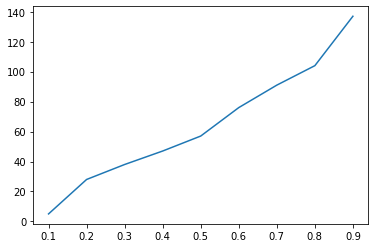

In [40]:
plt.plot(indices, results)

recombination - множитель вероятности попадания мутантов в новое поколение. Чем он больше, тем больше мутантов в новом поколении, но при этом возрастает риск нестабильности поколения. Значение по умолчанию - 0.7.

In [41]:
indices = []
results = []

for i in range (1, 10, 1):
    result = differential_evolution(ackley, bounds, recombination=i/10, seed=42)
    indices.append(i/10)
    results.append(result['nit'])
    print('recombination = {}, x = {}, f = {}, iter = {}'.format(i/10, result['x'], result['fun'], result['nit']))

recombination = 0.1, x = [0. 0.], f = 4.440892098500626e-16, iter = 126
recombination = 0.2, x = [0. 0.], f = 4.440892098500626e-16, iter = 110
recombination = 0.3, x = [0. 0.], f = 4.440892098500626e-16, iter = 108
recombination = 0.4, x = [0. 0.], f = 4.440892098500626e-16, iter = 108
recombination = 0.5, x = [0. 0.], f = 4.440892098500626e-16, iter = 107
recombination = 0.6, x = [0. 0.], f = 4.440892098500626e-16, iter = 96
recombination = 0.7, x = [0. 0.], f = 4.440892098500626e-16, iter = 90
recombination = 0.8, x = [0. 0.], f = 4.440892098500626e-16, iter = 84
recombination = 0.9, x = [0. 0.], f = 4.440892098500626e-16, iter = 85


В данном случае наблюдается обратная зависимость между параметром recombination и количество итераций. 

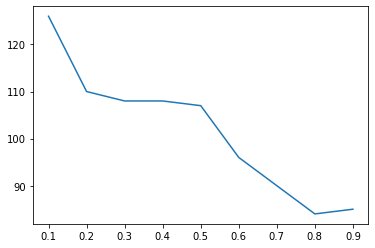

In [42]:
plt.plot(indices, results)

updating - обновление, немедленное или отложенное. При немедленном обновлении лучший кандидат обновляется постоянно в пределах одного поколения. При отложенном - один раз за поколение. По умолчанию - немедленное.

In [30]:
print(differential_evolution(ackley, bounds, updating='immediate', seed=42))

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])


In [31]:
print(differential_evolution(ackley, bounds, updating='deferred', seed=42))

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3753
     nit: 122
 success: True
       x: array([0., 0.])


Наблюдаем увеличение количества итераций при отложенном обновлении. С другой стороны, в этом случае возможна параллелизация процесса. 